<a href="https://colab.research.google.com/github/OAdams24/Temperature-Sensor-Control/blob/main/24WSA024_JNB_Coursework_Arduino_Programming_Beta_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **24WSA024 Coursework for Arduino Programming**


# **Academic Integrity**

**Your coursework submission must be your own work**

Academic misconduct will not be tolerated. Students should be familiar with [regulation XVIII (academic misconduct)](https://www.lboro.ac.uk/governance/regulations/18/) also detailed in the relevant section in the [student handbook](https://www.lboro.ac.uk/students/handbook/assessments/exams-information/academic-misconduct/).

For coursework, students should be aware of misconduct section vii:

*collusion – working with another student on an assessment which is intended to be the student’s own work. This includes submitting assessed work as the student’s own of which the student is not the sole author (because of the collusion with another student), or providing material which is submitted by another student as their own.*


# **Student Details**

Please fill in the following variables in the code cell below

In [ ]:
#@title student details
coursework_on = False
# do not write above this line ##########################################
# provide text to assign the following variables to your names and id:

firstname  = 'Ollie'
surname    = 'Adams'
student_id = 'F429486'
controller_name = 'Temperature Controller'      # make a name up for the robot controller

# do not write below this line ##########################################

details = {'firstname': firstname, 'surname': surname, 'student_id': student_id }
for key, value in details.items():
  print (f"{key:<15} {value if value else 'not entered'}")
if any([not(v) for v in details.values()]) and coursework_on:
  raise Exception("PLEASE SUPPLY YOUR STUDENT DETAILS")


firstname       Ollie
surname         Adams
student_id      F429486


#**Coursework**

This Notebook contains your coursework. It contains details of the tasks to complete and submission details.

**Introduction**

In this coursework, students are required to design a **low-power, dynamically optimized temperature monitoring system** using **Arduino**. The objective is to create an **efficient and responsive system** that minimizes **energy consumption** while ensuring **effective memory management**.

A **smart home environment** relies on a **temperature monitoring system** to regulate room temperature. The system uses a **temperature sensor** to collect real-time data, which is processed by an **Arduino-based controller**. The **CPU** decides whether to activate a **heater** based on temperature readings. This decision is crucial in maintaining a comfortable indoor environment while ensuring energy efficiency. However, if the system continuously samples temperature data at a high frequency, it results in excessive energy consumption. This is because the processor remains active, consuming power even when temperature fluctuations are minimal. Additionally, frequent sensor readings generate a large volume of data, increasing memory usage and slowing down processing. To address these inefficiencies, the system employs dynamic sampling adjustments, allowing it to switch between different power modes based on the rate of temperature change.

**Your Deliverables**

There are **four** main deliverables for this coursework as follows:

1. **Version Control** - Use of Git/Github
2. **Arduino Basics** – Learn Arduino basics, review provided C code, and answer conceptual questions.
3. **Data Analytics**  –Collect temperature data, store it efficiently, and analyze trends using Python, i.e.,visualising data by tabulation and/or using matplotlib
4. **Performance Optimization** – Implement adaptive sampling based on temperature changes to optimize power usage and memory storage.

These are further defined and explained in the specific corresponding coursework releases along with the marking criteria. Please ensure you follow the explicit instructions, and where directed ensure specific variable, function or object names and named/titled code cells are used.



###**Marking Schema**

Marks for each section are assigned as follows. A detailed breakdown is provided in the associated sections below.

| **Section**           | **Description**                                | **Marks** |
|----------------------|---------------------------------------------|---------|
| **Version Control**   | Use of Git/Github. | **15** |
| **Arduino Basics**   | Understanding Arduino fundamentals, reviewing provided C code, and answering conceptual questions. | **20** |
| **Data Analytics**   | Storing temperature data, analyzing trends, and producing tabular and graphical outputs. | **30** |
| **Performance Optimization** | Implementing adaptive sampling and optimizing energy efficiency in real-time temperature monitoring. | **35** |



###**How to Start**

It is important to approach this coursework methodically. A key learning outcome is to understand how to integrate hardware and software in an embedded system, as well as how to develop and optimize an existing system. This does not mean that you must fully understand every line of the provided Arduino code before starting, so do not feel overwhelmed.

First, begin by setting up the Arduino hardware. The system consists of an Arduino board connected to a temperature sensor. You should familiarize yourself with the correct wiring configuration, ensuring that the sensor's **VCC**, **GND**, and **Data Pin** are connected properly to the Arduino. Make sure to verify that the connections are stable before proceeding.

Second, study the provided C code that allows the Arduino to collect temperature readings. Identify key functions responsible for reading sensor data. Try modifying different parameters such as the sampling interval to observe how the system behaves. Work through this step interactively, compile the code, run it on the Arduino, and monitor the output in the serial console.

Next, analyze how the collected data is stored. The system logs temperature readings and outputs them directly to a file on the computer through the serial connection. This file will later be used for analysis in Python. You should understand how the Arduino writes data to the file and how Python will be used to process it.

Once data is collected, students will implement the **Discrete Fourier Transform (DFT)** in C to analyze the dominant temperature change frequencies. This analysis will allow the system to adjust the sampling rate dynamically, ensuring efficient energy use by detecting when high-frequency temperature variations occur.

Finally, after gaining a good understanding of how the system operates, move on to the optimization task. The goal is to implement an adaptive sampling strategy to adjust the system’s power consumption based on temperature fluctuations. The more stable the temperature, the less frequent the readings should be. This ensures that the system runs efficiently without unnecessary energy waste.

Approach this coursework iteratively, test your implementation, analyze the results, and refine your design as needed. By doing so, you will develop both a theoretical and practical understanding of embedded system optimization.




# **The Temperature Monitoring System and Its Three Modes**

The temperature monitoring system acts as an intelligent **environmental regulator**, which continuously assesses temperature fluctuations to determine the optimal response. It operates using an **adaptive control mechanism**, adjusting its **sampling rate and power mode** dynamically to balance energy efficiency and data accuracy.

The **sampling rate** defines how often temperature data is collected. If a fixed high **sampling rate** is used, it leads to **unnecessary energy consumption and excessive data storage**. **Sampling Frequency** refers to the number of samples taken per second when measuring a signal, which is expressed in Hertz (Hz), where 1 Hz = 1 sample per second. For example: If a system samples temperature data at 10 Hz, it means 10 temperature readings are taken every second.

The system features **three operating modes**, each designed to optimize energy use and performance:

1. **Active Mode**: The system enters this mode when **rapid temperature fluctuations** are detected. In this state, the **sampling frequency is high**, allowing for quick responses to environmental changes. This ensures that the system can react promptly, such as turning on a heater when a sudden drop in temperature occurs.

2. **Idle Mode**: When **temperature fluctuations are minor**, the system reduces its sampling frequency to a moderate level. This prevents unnecessary power consumption while still maintaining sufficient responsiveness to gradual temperature changes.

3. **Power Down Mode**: If the temperature remains **stable** over an extended period, the system further reduces its sampling frequency to the lowest level. This significantly **minimizes power consumption**, allowing the system to run efficiently without excessive data logging or energy waste.

Below is an **example** of the three modes, each with a different sampling frequency. The amount of stored temperature data depends on how often the system logs temperature readings.

$$Table1$$

| **Mode**              | **Sampling Rate**        | **Samples Per Hour** | **Samples Per Day** |
|----------------------|------------------------|---------------------|-------------------|
| **Power Down Mode**   | **1 sample per 30 sec** | 120                 | **2,880 samples** |
| **Idle Mode**        | **1 sample per 5 sec**  | 720                 | **17,280 samples** |
| **Active Mode**      | **1 sample per 1 sec**  | 3,600               | **86,400 samples** |

**Interpretation:**
- If the system **stays in Active Mode**, it can generate up to **86,400 data points per day**, which may exceed storage capacity.
- If the system **mostly stays in Power Down Mode**, it will store only **2,880 samples per day**, significantly reducing memory usage.
- Switching between modes **reduces unnecessary logging**, ensuring **only important temperature variations** are recorded.

These **three modes** allow the system to intelligently allocate resources, ensuring that energy is used only when necessary while still capturing relevant environmental data. The transition between modes is governed by **real-time analysis** of temperature trends, ensuring an efficient and adaptive monitoring process. To optimize energy efficiency, this coursework focuses on **dynamic sampling rate adjustments** based on temperature fluctuations.

This coursework contains 4 Tasks. Read the details for each Task below.

### **Task 1: Version Control**
This section is worth 15 marks. The learning objectives are to:
* Provide you with a deep understanding of version control.
* Learn specifically the use of Github and its integration with coding environments such as VSC or Colab
* Develop transferable skills for future coding projects

### **GitHub Account**

Using your **own** login credentials create a Github account. _**We advise you not to use you university password for other third party sites**_

Create a repository for your coursework project. Upload relevant documents such as this Jupyter Notebook.

Python Coursework

Add Philip (p.a.leicester@lboro.ac.uk) as a collaborator

Arduino Coursework

Add Wenheng (w.zhang2@lboro.ac.uk) as a collaborator

Note we will usually only check in on your Github at the end of the coursework.

## **Github Best Practice**

You must research the use of Github for your project. For example you can

* Use it merely as a cloud storage
* Manage versions of your code save as new files
* Use Git to manage code updates/modification in the same file allowing comparisons and code commits
* manage branching and merging
* Learn how to integrate it with your coding environment with Github desktop.
* Create and manage related documentation such as release notes.


Read about it

Play with it!

Use it!!!

See the free [e-book](https://git-scm.com/book/en/v2)


###**Assessment for Task1**

We will evaluate your use of version control at the end of your project.
Your repository should include brief release documents which explains to future developers what the required files are and their purpose.




### **Task 2: Arduino Temperature Sensor Data Collection**

In this task, students will build an **Arduino-based temperature monitoring system** that collects and logs temperature data using the **Grove - Temperature Sensor V1.2**.

The objective is to:

1. **Set up the hardware** and connect the temperature sensor to the Arduino. Build communications between the sensor and the Arduino, to read real-time temperature values. **Task 1.1 [5 marks]**

To complete this task, you need the following components:

- **Arduino board**
- **Grove Temperature Sensor**

Connect the temperature sensor to the Arduino as follows:

| **Grove Temperature Sensor Pin** | **Arduino Connection** |
|-------------------------------|---------------------|
| VCC                           | 5V                 |
| GND                           | GND                |
| Signal                        | A0 (Analog Pin)    |


2. **Log the collected data** read and self-learn from the code below and the provided website, and understand how to process it for further analysis, the student also need to answer the multiple choice questions based on the understanding.



### ** Provided Arduino Code**

The following Arduino program reads temperature values from the sensor and prints them to the **Serial Monitor**. You should download the Arduino IDE to run the code. The university computer Lab WPL107 installed the software, and you can also find it via [Arduino IDE](https://www.arduino.cc/en/software). The tutorials on using Arduino Software tools are available from: [Software tools](https://docs.arduino.cc/software/ide-v1/tutorials/Environment/). Connect your Arduino board and temperature sensor, then using Arduino IDE to run the code below to see how it works.

```c
// Demo code for Grove - Temperature Sensor V1.1/1.2
//Avaliable from https://wiki.seeedstudio.com/Grove-Temperature_Sensor_V1.2/
// Loovee @ 2015-8-26

#include <math.h>

const int B = 4275000;            // B value of the thermistor
const int R0 = 100000;            // R0 = 100k
const int pinTempSensor = A0;     // Grove - Temperature Sensor connect to A0

#if defined(ARDUINO_ARCH_AVR)
#define debug  Serial
#elif defined(ARDUINO_ARCH_SAMD) ||  defined(ARDUINO_ARCH_SAM)
#define debug  SerialUSB
#else
#define debug  Serial
#endif

void setup()
{
    Serial.begin(9600);
}

void loop()
{
    int a = analogRead(pinTempSensor);

    float R = 1023.0/a-1.0;
    R = R0*R;

    float temperature = 1.0/(log(R/R0)/B+1/298.15)-273.15; // convert to temperature via datasheet

    Serial.print("temperature = ");
    Serial.println(temperature);

    delay(100);
}
```

Read above code and learn from the provided website, then answer the following questions.

### **📌 Task 1.2 : Read above code and learn from the provided website, then answer the following questions.**


In [ ]:
#@title Grove Temperature Sensor Questions
# do not write above this comment ##############################################

# What type of sensor is the Grove Temperature Sensor?
a1p1q1_ans = {0: "unanswered",
               1: "Thermocouple",
               2: "NTC Thermistor",
               3: "Infrared Sensor",
               4: "Capacitive Sensor"
               }[2]

# What does `analogRead(pinTempSensor);` return?
a1p1q2_ans = {0: "unanswered",
               1: "A digital temperature value",
               2: "A raw voltage value (0-1023)",
               3: "A resistance value",
               4: "A Fahrenheit reading"
               }[2]

# Why do we use the logarithm function `log(R/R0)` in the calculation?
a1p1q3_ans = {0: "unanswered",
               1: "To convert temperature into resistance",
               2: "To linearize the thermistor response using the Steinhart-Hart equation",
               3: "To amplify the sensor signal",
               4: "To filter noise from the reading"
               }[2]

# What is the purpose of `Serial.begin(9600);` in the setup function?
a1p1q4_ans = {0: "unanswered",
               1: "To initialize communication between Arduino and Serial Monitor",
               2: "To set the baud rate of the temperature sensor",
               3: "To configure the analog pin",
               4: "To calibrate the sensor"
               }[1]

# Why is the delay of 100 milliseconds (`delay(100);`) used in the loop?
a1p1q5_ans = {0: "unanswered",
               1: "To improve sensor accuracy",
               2: "To prevent excessive readings that flood the Serial Monitor",
               3: "To allow the sensor to cool down",
               4: "To increase the sampling frequency"
               }[2]

# What does the line `float R = 1023.0/a-1.0;` compute?
a1p1q6_ans = {0: "unanswered",
                1: "The raw temperature value from the sensor",
                2: "The resistance of the thermistor",
                3: "The temperature in Fahrenheit",
                4: "The ADC voltage value"
                }[2]

# What will happen if the `analogRead(pinTempSensor);` function is removed from the loop?
a1p1q7_ans = {0: "unanswered",
                1: "The sensor will stop measuring temperature",
                2: "The Serial Monitor will still display correct readings",
                3: "The temperature will increase",
                4: "It will improve system performance"
                }[1]

# What is the main function of the `float temperature` variable?
a1p1q8_ans = {0: "unanswered",
                1: "Stores the raw ADC reading",
                2: "Stores the computed temperature in Celsius",
                3: "Stores the sensor calibration value",
                4: "Stores the voltage reference value"
                }[2]

# What is the role of the `B` constant in the formula?
a1p1q9_ans = {0: "unanswered",
                1: "It represents the temperature coefficient of the thermistor",
                2: "It is used to calibrate the sensor output",
                3: "It defines the thermistor resistance at 0°C",
                4: "It is used to scale the ADC reading"
                }[1]

# What happens if the thermistor is disconnected?
a1p1q10_ans = {0: "unanswered",
                1: "The temperature reading becomes zero",
                2: "The temperature reading becomes unstable or returns an error",
                3: "The Arduino stops working",
                4: "The resistance reading becomes infinite"
                }[2]

# Hard Question: How can we improve the accuracy of temperature readings?
a1p1q11_ans = {0: "unanswered",
                1: "Use a moving average filter",
                2: "Use a low-pass filter",
                3: "Increase the resolution of ADC readings",
                4: "All of the above"
                }[4]

# Hard Question: What is the best way to store long-term temperature data?
a1p1q12_ans = {0: "unanswered",
                1: "Use EEPROM",
                2: "Use an SD card module",
                3: "Use Serial Monitor only",
                4: "Store in volatile memory"
                }[2]

# What is the correct way to modify the code to log data in CSV format?
a1p1q13_ans = {0: "unanswered",
                1: "Use Serial.print() with comma-separated values and save via Serial Monitor",
                2: "Save data in JSON format",
                3: "Use EEPROM memory to store structured data",
                4: "Directly store in hexadecimal format"
                }[1]

# True or False: The sensor always gives perfect readings without any noise.
a1p1q14_ans = {0: "unanswered",
                1: "True",
                2: "False"
                }[2]

# What modification can be made to take temperature readings every 2 seconds instead of 100ms?
a1p1q15_ans = {0: "unanswered",
                1: "Change `delay(100);` to `delay(2000);`",
                2: "Change `Serial.begin(9600);` to `Serial.begin(4800);`",
                3: "Modify the B value in the formula",
                4: "Increase the ADC resolution"
                }[1]

# do not write below this comment ##############################################
# You may get a zero mark if this cell does not run.
# You can run the cell to check it and your answers.

a1p1_answers = [
    a1p1q1_ans, a1p1q2_ans, a1p1q3_ans, a1p1q4_ans, a1p1q5_ans,
    a1p1q6_ans, a1p1q7_ans, a1p1q8_ans, a1p1q9_ans, a1p1q10_ans,
    a1p1q11_ans, a1p1q12_ans, a1p1q13_ans, a1p1q14_ans, a1p1q15_ans
]

print("\n".join(["a1p1q" + str(i+1) + " " + repr(a) for i, a in enumerate(a1p1_answers)]))

# 15 Marks (1 per question)


a1p1q1 'unanswered'
a1p1q2 'unanswered'
a1p1q3 'unanswered'
a1p1q4 'unanswered'
a1p1q5 'unanswered'
a1p1q6 'unanswered'
a1p1q7 'unanswered'
a1p1q8 'unanswered'
a1p1q9 'unanswered'
a1p1q10 'unanswered'
a1p1q11 'unanswered'
a1p1q12 'unanswered'
a1p1q13 'unanswered'
a1p1q14 'unanswered'
a1p1q15 'unanswered'


### Task 3: Data Analysis Using Discrete Fourier Transform (DFT)

In this task, students will **analyse temperature sensor data** by applying the **Discrete Fourier Transform (DFT)**.

The objective is to:

1. **Understanding the DFT function**, **applying the DFT on collected data** to analyze the frequency components.

2. **Implement functions** for temperature collection and data transmission.

3. **Store the collected time-domain data and transferred frequency domain data** in a .CSV file.

4. **Visualizing the data** by plotting both **time-domain** and **frequency-domain** graphs in Python.



### **Understanding the Discrete Fourier Transform (DFT) Function**

Before implementing the **DFT function**, students need to self-study the theroy below to understand how the **Discrete Fourier Transform (DFT)** works and how to apply it to temperature data.

#### **Concept of DFT**
The **Discrete Fourier Transform (DFT)** converts a **time-domain signal** (temperature readings over time) into a **frequency-domain representation** (how frequently the temperature changes).

The formula for computing the magnitude of the frequency compinents is:

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j 2\pi k n / N} \text{(eq.3.1)}$$

Where:
- $X[k]$ = Frequency component at index $ k $
- $ x[n] $ = Temperature data at index $ n $
- $ N $ = Total number of samples
- $k $ = Frequency index (ranging from $0 $ to $ N-1 $ )
- $ j $ = Imaginary unit $ \sqrt{-1}$


The index \( k \) in the DFT output represents the frequency component of the original signal, but to obtain actual frequency values in Hz, we use the following equation:

$$f_k = \frac{k \cdot f_s}{N} \quad \text{(eq.3.2)}$$

where:
- $ f_k $ is the frequency corresponding to index $ k$.
- $ f_s $ is the sampling frequency (in Hz).
- $ N $ is the total number of samples.

Since **Arduino does not support complex numbers**, so we implement the real and imaginary parts using two arrays:
- **Real part:** Stores the cosine components of the transformation.

$$ \text{real}[k] = \sum_{n=0}^{N-1} x[n] \cdot \cos\left(\frac{2\pi k n}{N}\right) (eq.3.3)$$

- **Imaginary part:** Stores the sine components.

$$ \text{imag}[k] = -\sum_{n=0}^{N-1} x[n] \cdot \sin\left(\frac{2\pi k n}{N}\right) (eq.3.4)$$

- The magnitude of the frequency components is then calculated as:

$$ \text{Magnitude}[k] = \sqrt{\text{real}[k]^2 + \text{imag}[k]^2}   (eq.3.5) $$



---

### **📌 Task 3: Implementing Functions in Arduino IDE**

#### **Question 3.1**
Based on the provided code in Task 2, rewrite it by introducing a function called `collect_temperature_data()` to collect the temperature from the Grove Temperature Sensor for around 3 minutes, and save it in an array for DFT processing later. Ensure the loop function calls `collect_temperature_data()` correctly. The function should use suitable sampling intervals for collecting data. You can assume we are in the active mode, the sampling rate as Table 1.

**Hint:** Consider how to manage **fixed sampling intervals** using `delay()` to maintain accurate sampling.

**(3 Marks)**  

---

#### **Question 3.2**
Write a function called `apply_dft()` that applies Discrete Fourier Transform (DFT) in eq.3.1 - eq.3.5 on the collected temperature data in Question 3.1 to convert the signal into frequency-domain components. The function should return the computed frequency (eq.3.2) as a **pointer**. The magnitude of the frequency components should be **calculated and stored** as eq.3.5.

**(6 Marks)**  

---

#### **Question 3.3**
Write a function called `send_data_to_pc()` that sends time-domain and frequency-domain data via the Serial Monitor. The function should print time-domain temperature values. Compute the DFT magnitude spectrum and send the computed frequency values. Send frequency-domain data to the Serial Monitor for further analysis.

**Hint:** The format should be **Time, Temperature, Frequency, Magnitude**.  

**(3 Marks)**  

---

#### **Question 3.4**
Write a function `decide_power_mode()` that determines whether the system should **operate in Active, Idle, or Power-down mode** based on the collected temperature in Question 3.1 and calculated average temperature fluctuation frequency of Question 3.2.

If the average frequency is> 0.5 Hz, use a high sampling rate (Active Mode).
If 0.1 Hz < average frequency ≤ 0.5 Hz, use a medium sampling rate (Idle Mode).
If the average frequency is ≤ 0.1 Hz, switch to Power-down Mode (low sampling rate to conserve energy).

The function should **return a mode indicator** (`ACTIVE`, `IDLE`, or `POWER_DOWN`) based on the computed frequency.

**(6 Marks)**  

---

#### **Question 3.5**
**Save the time-domain and frequency-domain data in a CSV file.**   

The CSV file should store Four columns: **time in the first column, temperature values over 3 minutes in the second column, frequency components in the third column, and corresponding magnitude values in the fourth column**. The file should be named `threeminstemperature_Student_ID.csv`.

**(5 Marks)**

---

#### **Question 3.6**
After storing the temperature data in the .CSV file, use Python to read and visualize the saved data in the .CSV document and plot the **frequency components under the frequency domain**, and the 3-minute temperature under the time domain. Discuss your findings in the above figures.  

**Hint:** This part should be programmed using Python!  


**(7 Marks)**




### @title Answer for task 3.1-3.4

```c
#include <math.h>
#include <stdlib.h>

const int B = 4275000;            // B-value for the thermistor (used in Steinhart-Hart equation)
const int R0 = 100000;            // Resistance at 25°C for the thermistor (100k ohms)
const int pinTempSensor = A0;     // Temp sensor connected to analog pin A0

// Handle different board types for serial debugging
#if defined(ARDUINO_ARCH_AVR)
#define debug  Serial
#elif defined(ARDUINO_ARCH_SAMD) ||  defined(ARDUINO_ARCH_SAM)
#define debug  SerialUSB
#else
#define debug  Serial
#endif

// Power mode constants
#define ACTIVE 1
#define IDLE 2
#define POWER_DOWN 3

int output = 0;       // Stores current mode (ACTIVE, IDLE, etc.)
int interval = 1;     // Sampling interval in seconds

// Reads temperature values over time and returns an array of readings
float* collect_temperature_data(int interval, int duration, int* outSampleCount) {
    int totalSamples = duration / interval;
    *outSampleCount = totalSamples;

    float* temperatureData = (float*) malloc(totalSamples * sizeof(float));

    for (int x = 0; x < totalSamples; x++) {
        int a = analogRead(pinTempSensor);

        // Convert analog reading to resistance
        float R = 1023.0 / a - 1.0;
        R = R0 * R;

        // Apply thermistor formula to get temperature in Celsius
        float temperature = 1.0 / (log(R / R0) / B + 1 / 298.15) - 273.15;
        temperatureData[x] = temperature;

        Serial.print("temperature = ");
        Serial.println(temperature);

        delay(1000 * interval);  // Wait before next reading
    }

    return temperatureData;
}

// Runs a basic DFT to get frequency magnitudes from the temperature data
float* apply_dft(float* data, int N, float sampFrequency) {
    float* magnitudes = (float*) malloc((N / 2) * sizeof(float));

    for (int k = 0; k < N / 2; k++) {
        float real = 0.0;
        float imag = 0.0;

        for (int n = 0; n < N; n++) {
            float angle = 2.0 * PI * k * n / N;
            real += data[n] * cos(angle);
            imag -= data[n] * sin(angle);
        }

        magnitudes[k] = sqrt(real * real + imag * imag);  // Combine real + imaginary for total magnitude
        float freq = (k * sampFrequency) / N;             // (Not used here but useful for reference)
    }

    return magnitudes;
}

// Sends time domain and frequency domain data to serial for plotting or analysis
void send_data_to_pc(float* timeData, float* freqMag, int sampleCount, float interval){
    float sampFreq = 1.0 / interval;

    // Print time domain data
    for (int i = 0; i < sampleCount; i++) {
        float time = i * interval;
        Serial.print(time, 2);
        Serial.print(", ");
        Serial.print(timeData[i], 4);
        Serial.print(", ");
        Serial.print("0");
        Serial.print(", ");
        Serial.println("0");
    }

    // Print frequency domain data
    for (int k = 0; k < sampleCount / 2; k++) {
        float freq = (k * sampFreq) / sampleCount;

        Serial.print("0");
        Serial.print(", ");
        Serial.print("0");
        Serial.print(", ");
        Serial.print(freq, 4);
        Serial.print(", ");
        Serial.println(freqMag[k], 4);
    }
}

// Decides power mode based on weighted average of frequency magnitudes
int decide_power_mode(float* freqMagnitude, int sampleCount, float sampFreq){
    float sum = 0.0;
    float magSum = 0.0;
    int number = sampleCount / 2;

    for (int x = 0; x < number; x++) {
        float freq = (x * sampFreq) / sampleCount;
        float mag = freqMagnitude[x];

        sum += freq * mag;  // Weighted frequency sum
        magSum += mag;      // Total magnitude
    }

    float averageFreq = (magSum != 0) ? (sum / magSum) : 0.0;

    // Decide mode based on average frequency activity
    if (averageFreq > 0.5) {
        return ACTIVE;
    } else if (averageFreq > 0.1) {
        return IDLE;
    } else {
        return POWER_DOWN;
    }
}

void setup() {
    Serial.begin(9600);
}

void loop() {
    int duration = 3 * 60;       // Run for 3 minutes
    int sampleCount = 0;

    // Get temperature data over time
    float* tempData = collect_temperature_data(interval, duration, &sampleCount);

    // Run DFT to get frequency domain
    float* freqMagnitudes = apply_dft(tempData, sampleCount, 1.0);

    // Output both time and frequency data
    send_data_to_pc(tempData, freqMagnitudes, sampleCount, 1.0);

    // Decide what power mode to use based on DFT result
    output = decide_power_mode(freqMagnitudes, sampleCount, 1.0);

    // Free up the memory we allocated
    free(tempData);
    free(freqMagnitudes);
}


```

In [ ]:
#@title Answer for task 3.5

#Explain your solution steps for Question 3.5
#To convert the data from my program into a CSV file, I formatted the Serial output so that Time, Temperature, Frequency, and Magnitude values are printed in a single line separated by commas. This matches the structure of a standard CSV, which makes it easier to import into Excel or other data tools.
#I used Microsoft Data Streamer for Excel to read the real-time data from the Arduino. I adjusted the Data Streamer settings to display 270 cells, which was enough to capture both time-domain and frequency-domain data. Since frequency-domain data is mirrored after the halfway point (0.5 of the sampling frequency), I only needed to send and store half of it to save memory.
#After collecting the data, I copied the values from the Data Streamer sheet into a completely blank Excel file. I then saved that file as a .csv for later use.

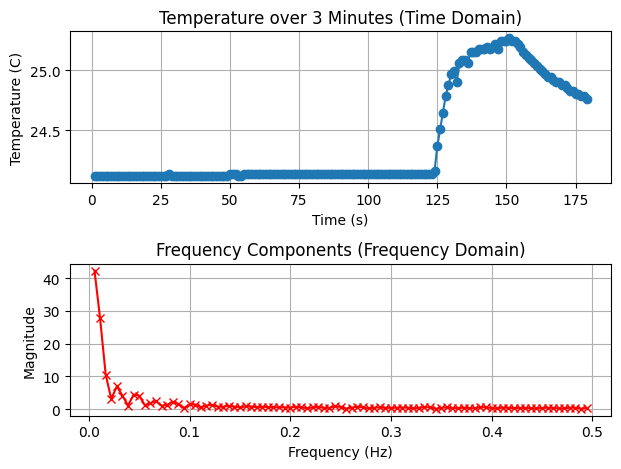

In [1]:
#@title Answer for task 3.6
#Provide your Python code here
import numpy as np
import matplotlib.pyplot as plt

filename = "threeminstemperature_F429486.csv"
data = np.genfromtxt(filename, delimiter=',')

time = data[:, 0]
temperature = data[:, 1]
frequency = data[:, 2]
magnitude = data[:, 3]

freqMask = (frequency > 0) & (time == 0)
timeMask = (time > 0) & (frequency == 0)

timeVals = time[timeMask]
tempVals = temperature[timeMask]

freqVals = frequency[freqMask]
magVals = magnitude[freqMask]

plt.subplot(2, 1, 1)
plt.plot(timeVals, tempVals, marker='o', linestyle='-')
plt.title("Temperature over 3 Minutes (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freqVals, magVals, marker='x', linestyle='-', color='r')
plt.title("Frequency Components (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()

avgTemp = np.mean(tempVals)
peakFreqIndex = np.argmax(magVals)
peakFreq = freqVals[peakFreqIndex]



### **Task 4: Adaptive Sampling Rate Optimization (35 marks)**

In this task, students will develop an intelligent temperature monitoring system that dynamically adjusts its sampling rate and power mode based on real-time temperature variations. The system will progressively transition between three power modes: Active Mode, Idle Mode, and Power Down Mode to optimize energy consumption while ensuring accurate temperature tracking. The key challenge is to implement a two-stage decision process that determines both the appropriate power mode and the optimal sampling rate based on temperature trends and frequency analysis.

Consider a scenario that the room temperature changes dynamically due to external factors (heater, air conditioner, or human influence).  
Instead of using a fixed sampling rate in Task 3 and Table 1, your system should adjust its sampling rate dynamically based on observed temperature fluctuations.

The system starts by collecting temperature data for one minute (one cycle) at an initial sampling rate (the students have the freedom to select the initial sampling rate). The collected data is then analyzed to determine whether temperature fluctuations are significant. This is done by computing the total difference between consecutive samples to assess how much the temperature changes over time. If the variation remains within a small predefined threshold (again, in the design, students need to define the threshold value based on their collected temperature data), the system switches to Idle Mode to reduce power consumption. If Idle Mode persists for five consecutive cycles, indicating long-term stability, the system enters Power Down Mode to further conserve energy. However, if a sudden temperature fluctuation occurs at any stage, the system immediately reactivates Active Mode to ensure accurate monitoring.  Additionally, Discrete Fourier Transform analysis is used to detect dominant frequency components, dynamically adjusting the sampling rate based on real-time temperature trends. This adaptive strategy prevents unnecessary high-frequency sampling when the environment remains stable, while ensuring quick responsiveness to sudden changes, ultimately balancing accuracy and power efficiency.

To further refine the decision-making process, DFT extracts dominant frequency components from the temperature variations. By transforming the data into the frequency domain, the system can identify periodic patterns in temperature changes. The DC component (k = 0), representing the overall average temperature, should be ignored, and only frequency components relevant to temperature fluctuations should be considered. The dominant frequency will be used as a reference to adjust the sampling rate dynamically.

Once the system determines whether to operate in Active, Idle, or Power Down Mode, the sampling rate must be adjusted dynamically. The dominant frequency extracted from apply_dft() in your Task 3 should be rewrite to guide this adjustment. The sampling rate must be at least twice the dominant frequency to satisfy **Nyquist’s sampling theorem** and avoid data loss. For instance, if the dominant frequency is 1.8 Hz, the sampling rate should be 3.6 Hz or higher. However, if temperature variations remain stable, the sampling rate should gradually decrease to minimize energy usage. The system must ensure the sampling rate remains within a predefined range, such as between 0.5 Hz and 4.0 Hz, to maintain efficiency.

A future temperature variation trend must also be predicted using a moving average method. Students should track temperature variation trends over the last 5 to 10 monitoring cycles and compute a moving average based on the last 10 temperature differences. This prediction helps determine whether temperature fluctuations are increasing, decreasing, or remaining stable, which directly influences the choice of power mode. If the predicted variation is large, the system remains in Active Mode; if it is moderate, the system enters Idle Mode. If temperature fluctuations stay consistently low for five consecutive cycles, the system transitions into Power Down Mode to further conserve energy. To learn how to implementation of the moving average in Arduino, please refer to: https://www.aranacorp.com/en/implementation-of-the-moving-average-in-arduino/

In addition to power mode optimization, students must also consider memory storage limitations. Since Arduino devices have limited RAM, inefficient storage can lead to system failures. Students must evaluate how memory is utilized in their implementation and identify ways to optimize storage.

---

### **Expected System Behavior**

1. It **analyzes the variations of collected temperature** to determine if the temperature is fluctuating significantly.
2. **DFT is applied** to find the **dominant frequency** of temperature variations.💡
3. **The best power mode is selected** based on predicted variations.
4. **Adjust the sampling rate dynamically** to reduce **power consumption** while maintaining accurate monitoring.
5. A **future variation trend is predicted** using a moving average.
6. Explain how memory is utilized in your implementation of Task 4. Are there any memory optimizations that could be made to reduce usage? What is the impact of storing large arrays in an Arduino environment? Provide a justified explanation and suggest at least one possible enhancement to improve memory efficiency in this coursework.


---

### **📌 Example of Sample Serial Outputs (Feel free to design your own outputs)**

```
Collecting temperature data for 1 minute...
Predicted Variation: 4.20, Dominant Frequency: 1.80 Hz, New Sampling Rate: 2.70 Hz, Power Mode: ACTIVE

Collecting temperature data for 1 minute...
Predicted Variation: 1.80, Dominant Frequency: 1.00 Hz, New Sampling Rate: 1.00 Hz, Power Mode: IDLE

Collecting temperature data for 1 minute...
Predicted Variation: 0.40, Dominant Frequency: 0.30 Hz, New Sampling Rate: 0.50 Hz, Power Mode: POWER_DOWN
```

---
**(35 Marks)**

## **Marking Criteria**

There are 35/100 marks for this assessment section. Your submission will be awarded a descriptor category according to the following criteria.

| Descriptor    | Description |
|--------------|-------------|
| Unacceptable | No meaningful attempt at optimizing sampling or adjusting power modes. |
| Weak | Basic implementation of sampling adjustment without DFT analysis. |
| Reasonable | Uses DFT to determine dominant frequency but lacks adaptive power mode switching. |
| Good | Implements dynamic power mode selection based on temperature variations and DFT output. |
| Excellent | Fully optimized system with smooth mode transitions and effective power management. |
| Outstanding | Includes predictive sampling adjustments, trend analysis, and optimized boundary conditions for power mode switching. |



### **📌 Submission Requirement**
To complete this assignment, students must upload below files in the shared Github account:
1. Image for Arduino-Sensor Connection, submit a clear image of the Arduino hardware setup showing the temperature sensor wiring.(Save the image as a suitable file with the format, e.g., your_name_arduino_setup.jpg)
2. Temperature Data (CSV File). Submit a .csv file containing time-domain temperature data & frequency domain results. (The file should be named threeminstemperature_Student_ID.csv).
3. Jupyter Notebook Report. All code implementations, **explanations**, and outputs should be included in the Jupyter Notebook.
4. Arduino Code (.ino file). Submit the Arduino IDE code as a separate .ino file.
---

# **<END>**

# **End of Workbook**